## 1. 신고 결과 받기

# problem1
'''
이용자의 ID가 담긴 문자열 배열 id_list, 각 이용자가 신고한 이용자의 ID 정보가 담긴 문자열 배열 report, 
정지 기준이 되는 신고 횟수 k가 매개변수로 주어질 때, 각 유저별로 처리 결과 메일을 받은 횟수를 배열에 담아 return 하도록 solution 함수를 완성해주세요.
'''

#idea
'''
1) 각 유저별로 신고당한 횟수를 저장해야됨
2) 신고당한 횟수 >= k 가 되면 정지되는 조건
3) 유저가 신고해서 정지를 당하면 신고한 유저에게 메일을 가게 만들어야함
+ 한사람이 여러번 신고한것을 한 번 신고한걸로 처리하는 코드도 필요함.
---
report 형태를 보면 공백으로 한칸이 띄워져 있는데 공백을 기준으로 나눠서 신고한 유저/ 신고당한 유저를 구분
구분한 뒤 신고한 유저의 id를 key, 신고당한 유저의 id를 value로 하는 dic로 하는건 어떨까
'''

In [1]:
## 1트 (실패)

id_list =  ["muzi", "frodo", "apeach", "neo"]
report = ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi"]
k = 2

accuser = [] # 신고를 한 사람
accused = [] # 신고 당한 사람
black_list = [] # 신고를 k회 이상 받은 사람
d = {}
for i in range(len(report)):
    p = report[i].split()
    accuser.append(p[0])
    accused.append(p[1])
    d[p[0]] = p[1]
print(d)
# print(f"신고를 한 사람: {accuser}")
# print(f"신고 당한 사람 : {accused}")
# for id in id_list:
#     print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
#     if accused.count(id) >= k:
#         black_list.append(id)
# print(black_list)

{'muzi': 'neo', 'apeach': 'muzi', 'frodo': 'neo'}


#### 문제 : 정지된 사람을 저장하는것까진 완성했지만, 정지된 사람을 신고한 사람을 어떻게 가져와야되는가?
dictionary는 key 중복이 안되기 때문에 한사람이 두명 이상을 신고했을때는 위 방법대로라면 두 개 이상의 이름이 저장이 되지 않음.  
위 방법은 신고를 한 사람을 key로 하고 신고를 당한 사람을 value로 했음.  
~~밑에 주석 처리 된 코드를 보면 신고를 k번 이상 받아 정지된 사람을 저장하는 black_list 리스트가 있는데  
이 리스트를 이용해서 반대로 정지된 사람을 key로 하고 정지된 사람을 신고한 사람을 value로 하는 dic로 하는건 어떨까?~~  
=> return 하는 배열은 id_list에 담긴 id 순서대로 각 유저가 받은 결과 메일 수를 담으면 됩니다.  

In [8]:
## 2트 (실패)

def solution(id_list, report, k):
    cnt = {} # 메일 count
    for id in id_list:
        cnt[id] = 0
    print(cnt)

    accuser = [] # 신고를 한 사람
    accused = [] # 신고 당한 사람
    black_list = [] # 신고를 k회 이상 받은 사람

    for i in range(len(report)):
        p = report[i].split()
        accuser.append(p[0])
        accused.append(p[1])

    print(f"신고를 한 사람: {accuser}")
    print(f"신고 당한 사람 : {accused}")
    for id in id_list:
        print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
        if accused.count(id) >= k:
            black_list.append(id)
    print(f"게시판 정지 이용자 : {black_list}")
    for j in range(len(black_list)):
        for i in range(len(report)):
            if black_list[j] in accused[i]:
                print(f"{accuser[i]} 이용자가 {black_list[j]} 이용자를 신고함.")
                cnt[accuser[i]] += 1
    print(cnt)
    result = []
    for id in id_list:
        result.append(cnt[id])
    return result

print(solution(["muzi", "frodo", "apeach", "neo"], ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi"], 2))

{'muzi': 0, 'frodo': 0, 'apeach': 0, 'neo': 0}
신고를 한 사람: ['apeach', 'muzi', 'frodo', 'apeach', 'muzi']
신고 당한 사람 : ['frodo', 'frodo', 'neo', 'muzi', 'neo']
id: muzi,   신고당한 횟수: 1
id: frodo,   신고당한 횟수: 2
id: apeach,   신고당한 횟수: 0
id: neo,   신고당한 횟수: 2
게시판 정지 이용자 : ['frodo', 'neo']
apeach 이용자가 frodo 이용자를 신고함.
muzi 이용자가 frodo 이용자를 신고함.
frodo 이용자가 neo 이용자를 신고함.
muzi 이용자가 neo 이용자를 신고함.
{'muzi': 2, 'frodo': 1, 'apeach': 1, 'neo': 0}
[2, 1, 1, 0]


한 유저를 여러 번 신고할 수도 있지만, 동일한 유저에 대한 신고 횟수는 1회로 처리되는 경우를 반영을 안했음.  
테스트 1은 통과했지만 테스트 2에서 k = 3이고 con 이 ryan을 4번 신고한 경우는 1회 신고한것으로 되어야하지만  
그대로 4번 신고한것으로 간주되어 ryan이 정지 id가 되면서 테스트 2에서 통과하지 못했음.
```python
for id in id_list:
    print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
    if accused.count(id) >= k:
        black_list.append(id)
```

이 코드를 수정하던가, 신고한 사람이랑 신고 당한 사람을 구분하는 리스트 형식을 바꾸던가 해야될듯 (2hour)

다른 방법 : report list 안에 있는 중복요소들을 다 제거하기
``` report = list(set(report)) ```

In [13]:
## 3트 (실패)

def solution(id_list, report, k):
    cnt = {} # 메일 count
    for id in id_list:
        cnt[id] = 0
    print(cnt)

    accuser = [] # 신고를 한 사람
    accused = [] # 신고 당한 사람
    black_list = [] # 신고를 k회 이상 받은 사람

    report = list(set(report))
    for i in range(len(report)):
        p = report[i].split()
        accuser.append(p[0])
        accused.append(p[1])

    print(f"신고를 한 사람: {accuser}")
    print(f"신고 당한 사람 : {accused}")
    for id in id_list:
        print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
        if accused.count(id) >= k:
            black_list.append(id)
    print(f"게시판 정지 이용자 : {black_list}")
    for j in range(len(black_list)):
        for i in range(len(report)):
            if black_list[j] in accused[i]:
                print(f"{accuser[i]} 이용자가 {black_list[j]} 이용자를 신고함.")
                cnt[accuser[i]] += 1
    print(cnt)
    result = []
    for id in id_list:
        result.append(cnt[id])
    return result

print(solution(["muzi", "frodo", "apeach", "neo"], ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi", "apeach muzi"], 2))

{'muzi': 0, 'frodo': 0, 'apeach': 0, 'neo': 0}
신고를 한 사람: ['apeach', 'muzi', 'frodo', 'apeach', 'muzi']
신고 당한 사람 : ['frodo', 'frodo', 'neo', 'muzi', 'neo']
id: muzi,   신고당한 횟수: 1
id: frodo,   신고당한 횟수: 2
id: apeach,   신고당한 횟수: 0
id: neo,   신고당한 횟수: 2
게시판 정지 이용자 : ['frodo', 'neo']
apeach 이용자가 frodo 이용자를 신고함.
muzi 이용자가 frodo 이용자를 신고함.
frodo 이용자가 neo 이용자를 신고함.
muzi 이용자가 neo 이용자를 신고함.
{'muzi': 2, 'frodo': 1, 'apeach': 1, 'neo': 0}
[2, 1, 1, 0]


테스트 3 : 시간초과  
테스트 5, 8, 9, 11, 12, 14 ~ 21 실패  

In [ ]:
## 4트 (실패)

def solution(id_list, report, k):
    cnt = {} # 메일 count
    for id in id_list:
        cnt[id] = 0
    print(f" 각각 메일을 받는 빈 딕셔너리: {cnt}")
    print("")

    accuser = [] # 신고를 한 사람
    accused = [] # 신고 당한 사람
    black_list = [] # 신고를 k회 이상 받은 사람

    report = list(set(report))
    for i in range(len(report)):
        p = report[i].split()
        accuser.append(p[0])
        accused.append(p[1])

    print(f"신고를 한 사람: {accuser}")
    print(f"신고 당한 사람: {accused}")
    print("")
    for id in id_list:
        print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
        if accused.count(id) >= k:
            black_list.append(id)
    print("")
    print(f"게시판 정지 이용자 : {black_list}")
    for j in range(len(black_list)):
        for i in range(len(report)):
            if black_list[j] in accused[i]:
                print(f"{accuser[i]} 이용자가 {black_list[j]} 이용자를 신고함.")
                cnt[accuser[i]] += 1
    print("")
    print(cnt)
    result = []
    for id in id_list:
        result.append(cnt[id])
    return result

print(solution(["muzi", "frodo", "apeach", "neo", "asdf"], ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi", "apeach muzi"], 2))

{'muzi': 0, 'frodo': 0, 'apeach': 0, 'neo': 0, 'asdf': 0}
신고를 한 사람: ['apeach', 'muzi', 'frodo', 'apeach', 'muzi']
신고 당한 사람 : ['frodo', 'frodo', 'neo', 'muzi', 'neo']
id: muzi,   신고당한 횟수: 1
id: frodo,   신고당한 횟수: 2
id: apeach,   신고당한 횟수: 0
id: neo,   신고당한 횟수: 2
id: asdf,   신고당한 횟수: 0
게시판 정지 이용자 : ['frodo', 'neo']
apeach 이용자가 frodo 이용자를 신고함.
muzi 이용자가 frodo 이용자를 신고함.
frodo 이용자가 neo 이용자를 신고함.
muzi 이용자가 neo 이용자를 신고함.
{'muzi': 2, 'frodo': 1, 'apeach': 1, 'neo': 0, 'asdf': 0}
[2, 1, 1, 0, 0]


<힌트>
``` python
    for j in range(len(black_list)):
        for i in range(len(report)):
            if black_list[j] in accused[i]:
                print(f"{accuser[i]} 이용자가 {black_list[j]} 이용자를 신고함.")
                cnt[accuser[i]] += 1
```
위 코드에서 문제가 있다  
if 문에서 비교를 하는 대상이 무엇인가  
내 코드에서는 accused 신고당한 사람의 리스트에서 정지당한 이용자가 있으면 신고당한 사람의 인덱스를 뽑아오고 신고당한 사람과 신고한 사람의 인덱스가 같기 때문에 그 인덱스를 통해 신고한 사람을 파악해 신고자 count를 += 1 해주는 코드임.  
if문에서 비교 연산자를 in이 아니라 ==을 해야지 내가 위에서 의도했던 코드가 되는거였음.  
왜 in을 쓰면 안되는가...?


비교 연산자는 수정했고 피드백 중 리스트나 딕셔너리 등 iteration이 가능한 변수는 자체로 for문을 사용할 수 있기 때문에 enumerate를 사용해서 코드를 다시 짜보자.  
```python
    for b_idx, user in enumerate(black_list): # black_list 에서 인덱스와 사용자 id를 가져옴   ex) 0 frodo 1 neo
        for a_idx, ac in enumerate(accused):  # accused 에서 인덱스와 사용자 id를 가져옴      
            if user == ac:
                cnt[accuser[a_idx]] += 1 
```

In [12]:
## 5트 (실패, 3번 시간 초과를 제외한 다른 테스트는 통과)

def solution(id_list, report, k):
    cnt = {} # 메일 count
    for id in id_list:
        cnt[id] = 0
    print(f" 각각 메일을 받는 빈 딕셔너리: {cnt}")
    print("")

    accuser = [] # 신고를 한 사람
    accused = [] # 신고 당한 사람
    black_list = [] # 신고를 k회 이상 받은 사람

    report = list(set(report))
    for i in range(len(report)): 
        p = report[i].split()
        accuser.append(p[0])
        accused.append(p[1])

    print(f"신고를 한 사람: {accuser}")
    print(f"신고 당한 사람: {accused}")
    print("")
    for id in id_list:
        print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
        if accused.count(id) >= k:
            black_list.append(id)
    print("")
    print(f"게시판 정지 이용자 : {black_list}")
    for b_idx, user in enumerate(black_list): # black_list 에서 인덱스와 사용자 id를 가져옴   ex) 0 frodo 1 neo
        for a_idx, ac in enumerate(accused):  # accused 에서 인덱스와 사용자 id를 가져옴      ex) 0 neo 1 frodo 2 muzi  3 neo   4 frodo
            if user == ac:  # black_list 안에 있는 사용자가 신고 당한적이 있는사람이라면
                cnt[accuser[a_idx]] += 1 # 신고를 당한사람을 신고한 accuser인덱스를 가져와서 count += 1
    print("")
    print(cnt)
    result = []
    for id in id_list:
        result.append(cnt[id])
    return result

print(solution(["muzi", "frodo", "apeach", "neo", "asdf"], ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi", "apeach muzi"], 2))

 각각 메일을 받는 빈 딕셔너리: {'muzi': 0, 'frodo': 0, 'apeach': 0, 'neo': 0, 'asdf': 0}

신고를 한 사람: ['frodo', 'muzi', 'apeach', 'muzi', 'apeach']
신고 당한 사람: ['neo', 'frodo', 'muzi', 'neo', 'frodo']

id: muzi,   신고당한 횟수: 1
id: frodo,   신고당한 횟수: 2
id: apeach,   신고당한 횟수: 0
id: neo,   신고당한 횟수: 2
id: asdf,   신고당한 횟수: 0

게시판 정지 이용자 : ['frodo', 'neo']

{'muzi': 2, 'frodo': 1, 'apeach': 1, 'neo': 0, 'asdf': 0}
[2, 1, 1, 0, 0]


이제 로직은 문제가 없고, 3번 테스트 시간초과 문제만 해결하면 진짜 끝.  
시간 초과될만한 요소는  report의 길이가 최대 20만이 될 수 있기 때문에 report 연산을 수행하는 부분에서 시간초과가 난다고 생각했음.  

``` python
    report = list(set(report))
    for i in range(len(report)): 
        p = report[i].split()
        accuser.append(p[0])
        accused.append(p[1])
```
이 부분을 수정하면 통과하지 않을까? 라는 생각이 드는데

In [17]:
## 5트 (실패, 3번 시간 초과를 제외한 다른 테스트는 통과)

def solution(id_list, report, k):
    cnt = {} # 메일 count
    for id in id_list:
        cnt[id] = 0
    print(f" 각각 메일을 받는 빈 딕셔너리: {cnt}")
    print("")

    accuser = [] # 신고를 한 사람
    accused = [] # 신고 당한 사람
    black_list = [] # 신고를 k회 이상 받은 사람

    report = list(set(report))
    for idx, rep in enumerate(report):
        p = rep.split()
        accuser.append(p[0])
        accused.append(p[1])

    print(f"신고를 한 사람: {accuser}")
    print(f"신고 당한 사람: {accused}")
    print("")
    for id in id_list:
        print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
        if accused.count(id) >= k:
            black_list.append(id)
    print("")
    print(f"게시판 정지 이용자 : {black_list}")
    for b_idx, user in enumerate(black_list): # black_list 에서 인덱스와 사용자 id를 가져옴   ex) 0 frodo 1 neo
        for a_idx, ac in enumerate(accused):  # accused 에서 인덱스와 사용자 id를 가져옴      ex) 0 neo 1 frodo 2 muzi  3 neo   4 frodo
            if user == ac:  # black_list 안에 있는 사용자가 신고 당한적이 있는사람이라면
                cnt[accuser[a_idx]] += 1 # 신고를 당한사람을 신고한 accuser인덱스를 가져와서 count += 1
    print("")
    print(cnt)
    result = [cnt[id] for id in id_list]
    return result

print(solution(["muzi", "frodo", "apeach", "neo", "asdf"], ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi", "apeach muzi"], 2))

 각각 메일을 받는 빈 딕셔너리: {'muzi': 0, 'frodo': 0, 'apeach': 0, 'neo': 0, 'asdf': 0}

[]
신고를 한 사람: []
신고 당한 사람: []

id: muzi,   신고당한 횟수: 0
id: frodo,   신고당한 횟수: 0
id: apeach,   신고당한 횟수: 0
id: neo,   신고당한 횟수: 0
id: asdf,   신고당한 횟수: 0

게시판 정지 이용자 : []

{'muzi': 0, 'frodo': 0, 'apeach': 0, 'neo': 0, 'asdf': 0}
[0, 0, 0, 0, 0]


#### 목표 : 위 코드를 수정해서 completion time 을 줄이기
- report 중복을 제거하는 부분 수정하거나
- report 에서 신고하는사람, 신고받은사람을 나누는 과정을 수정

1트
``` python
    report = []
    for u in re:
        if u not in report:
            report.append(u)
```
report에 직접 중복을 없애서 append 하는식으로도 해봤는데 이전보다 더 많은 시간 초과가 발생.

2트
`list(set(report))` 에서 굳이 report를 list로 다시 변환하지 않고 set인 상태에서 연산을 수행하는 코드로 다시 작성해보기  
검색해보니 set으로는 연산이 힘들것같아서 포기

3트
`list(et(report))` 는 그대로 사용하되, 신고한사람과 신고 당한사람을 key, value로 하는 dictionary로 자료형을 변환해보기  
ex) ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi"]  
    => {"muzi" : ["frodo, neo"], "apeach" : ["frodo, muzi"], "frodo" : ["neo"]}


---

## 2. 시소 짝꿍(성공)

즉, 탑승한 사람의 무게와 시소 축과 좌석 간의 거리의 곱이 양쪽 다 같다면 시소 짝꿍이라고 할 수 있습니다.

In [ ]:
## 1트 (약간 느낌만 알아가는...?)

weights = [100,180,360,100,270]	
cnt = 0
for w_1 in weights:
    for w_2 in weights:
        for d_1 in range(2,5):
            for d_2 in range(2,5):
                if w_1 * d_1 == w_2 * d_2:
                    # print(f"{w_1} * {d_1} == {w_2} * {d_2}")
                    cnt += 1
print(cnt)

100 * 2 == 100 * 2
100 * 3 == 100 * 3
100 * 4 == 100 * 4
100 * 2 == 100 * 2
100 * 3 == 100 * 3
100 * 4 == 100 * 4
180 * 2 == 180 * 2
180 * 3 == 180 * 3
180 * 4 == 180 * 4
180 * 4 == 360 * 2
180 * 3 == 270 * 2
360 * 2 == 180 * 4
360 * 2 == 360 * 2
360 * 3 == 360 * 3
360 * 4 == 360 * 4
360 * 3 == 270 * 4
100 * 2 == 100 * 2
100 * 3 == 100 * 3
100 * 4 == 100 * 4
100 * 2 == 100 * 2
100 * 3 == 100 * 3
100 * 4 == 100 * 4
270 * 2 == 180 * 3
270 * 4 == 360 * 3
270 * 2 == 270 * 2
270 * 3 == 270 * 3
270 * 4 == 270 * 4
27


중복되는 경우의 수가 생겨서 실패

In [22]:
## 2트 (실패)

def solution(weights):
    cnt = 0
    for w_1 in weights:
        for w_2 in weights:
            if w_1 == w_2:
                break
            for d_1 in range(2,5):
                for d_2 in range(2,5):
                    if w_1 * d_1 == w_2 * d_2:
                        print(f"{w_1} * {d_1} == {w_2} * {d_2}")
                        cnt += 1
    for i in range(len(weights)): # 같은 몸무게인 사람이 2명 이상일 때:
        if weights.count(weights[i]) >= 2:
            n = weights.count(weights[i])
            cnt += n*(n-1)//2
            print(weights[i], i)
            break
    return cnt

print(solution([100,180,360,100,270]))

360 * 2 == 180 * 4
270 * 2 == 180 * 3
270 * 4 == 360 * 3
100 0
4


테스트 1, 2, 12, 16, 17 통과  
테스트 3, 13, 14, 15 실패  
테스트 4 ~ 11 (시간 초과) 실패  

1) 같은 몸무게인 사람의 처리에 대해 처리
2) completion time 줄이기



[100,100,200,300] 같은경우엔 
100 = 100  
100 * 4 = 200 * 2  
100 * 4 = 200 * 2  
200 * 3 = 300 * 2  

[100,100,100,200,300]  

100 = 100 x 3C2개 => 3  
100 * 4 = 200 * 2 X3개 => 3  
200 * 3 = 300 * 2 => 1  

[150,150, 200,200,200, 300,300,300]  : 조금 복잡하면서도 그나마 손으로 계산하기 용이한 test case를 통해 문제를 풀어보고자 함
150 * 4 = 300 * 2 2X3 => 6  
200 * 3 = 300 * 2 3x3 => 9  
200 * 3 = 150 * 4 3x2 => 6  
150 = 150 => 1  
200 = 200 => 3C2 => 3  
300 = 300 => 3c2 => 3  
Total: 28  

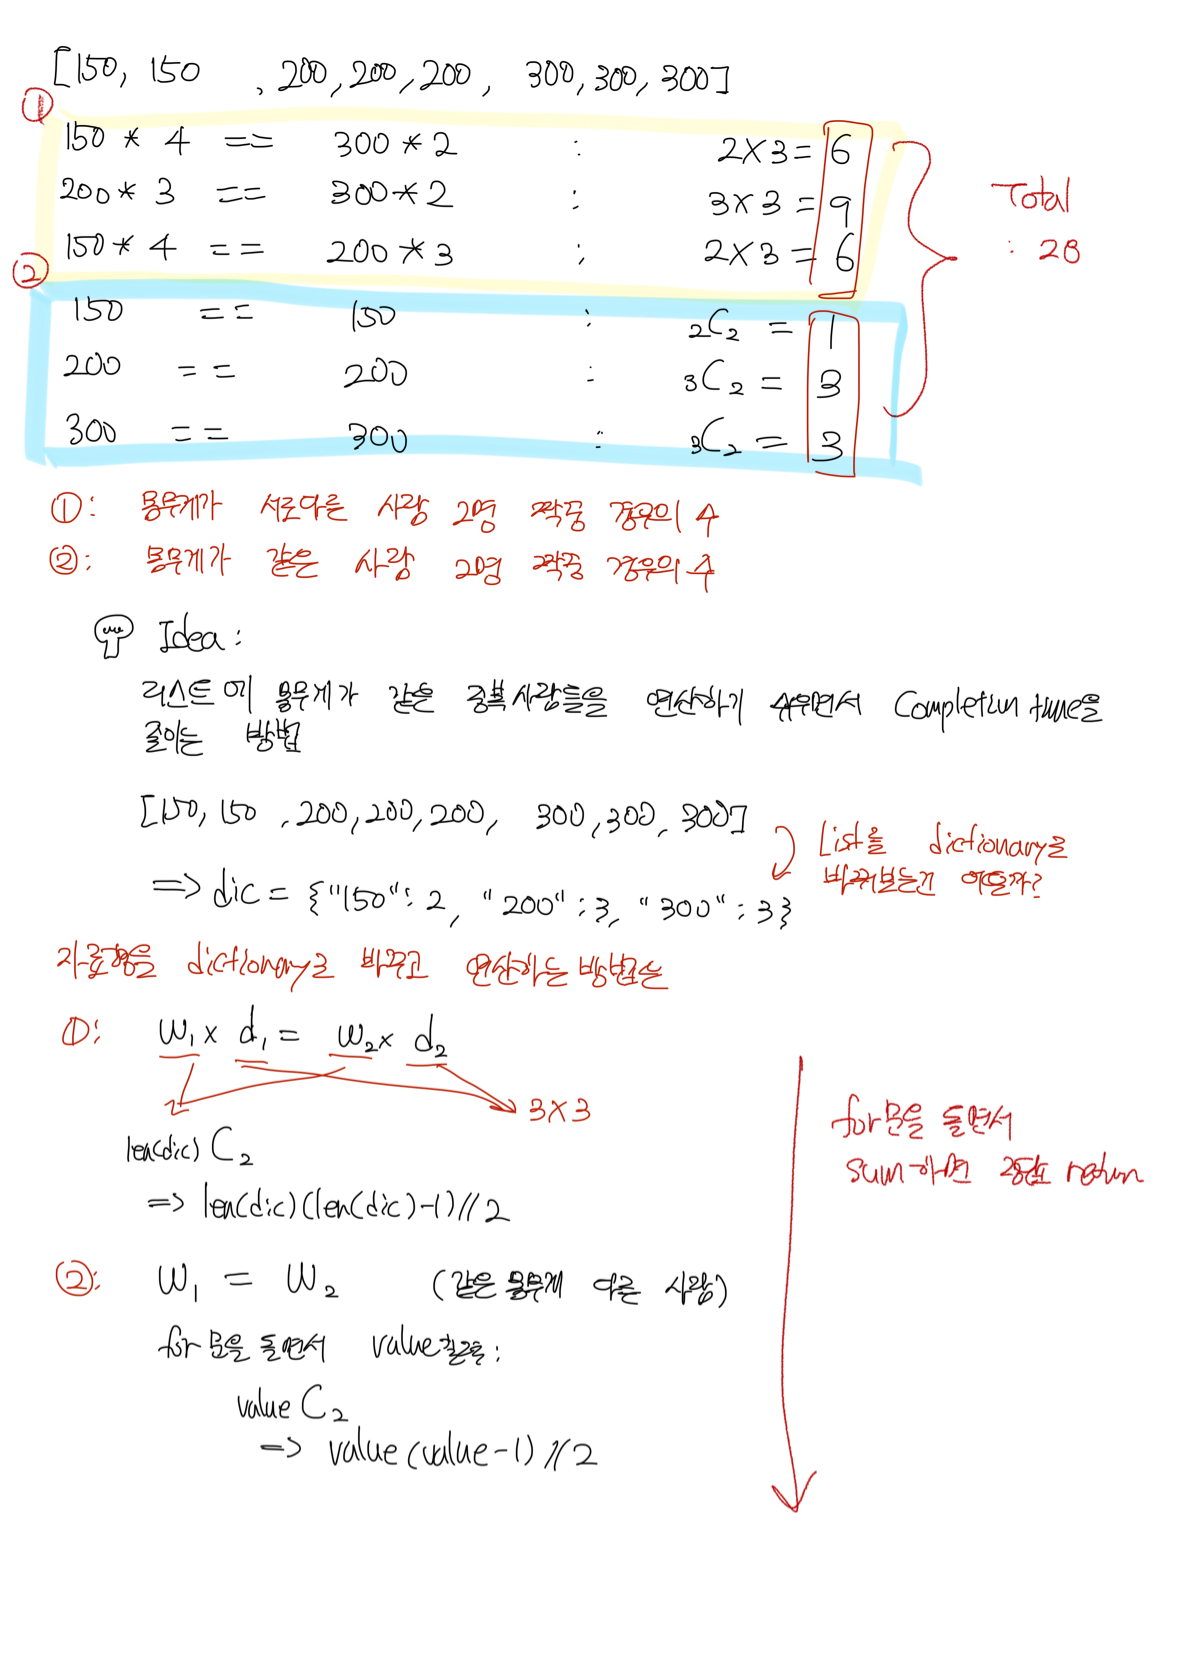

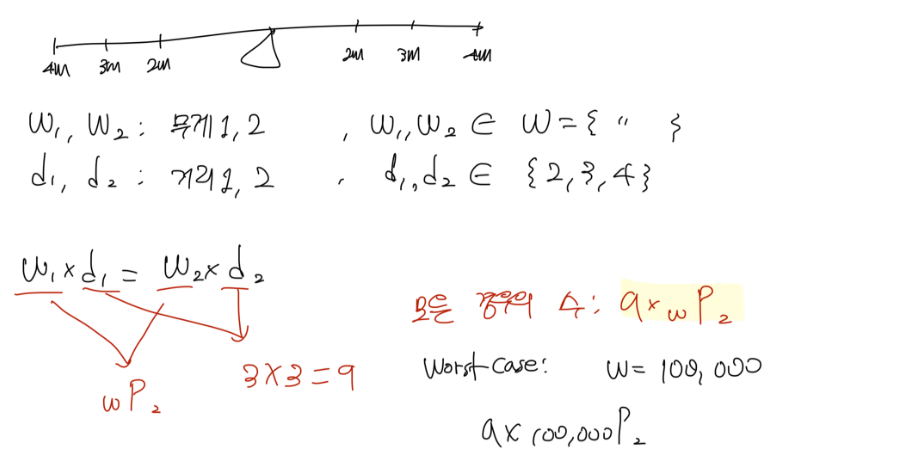

시간초과 같은 경우는 weights의 길이가 최대 10만이기 때문에 위 식처럼 w_1과 w_2에 각각 값을 집어놓고 계산을 하게 된다면 completion time이 O(n^2) 10만^2의 계산이 생기므로 dictionary를 통해 계산량을 줄여봤음.

In [24]:
## 3트 (성공)

def solution(weights):
    cnt = 0
    num = list(set(weights)) # dictionary에서 key가 될 숫자
    dic = {} # 몸무게가 key이고 몸무게가 같은 사람이 몇명있는지가 value
    for k in num:
        dic[k] = weights.count(k)
    print(dic)
    for key_1 in dic.keys():
        value_1 = dic[key_1]
        # print(f"key_1 : {key_1}, value_1 : {value_1}")
        for key_2 in dic.keys():
            value_2 = dic[key_2]
            if key_1 == key_2:
                break
            for d_1 in range(2,5):
                for d_2 in range(2,5):
                    if key_1 * d_1 == key_2 * d_2:
                        print(f"{key_1} * {d_1} == {key_2} * {d_2}")
                        cnt += value_1 * value_2 # case 1
    for key_1 in dic.keys():
        value_1 = dic[key_1]
        for key_2 in dic.keys():
            value_2 = dic[key_2]
            if key_1 == key_2:
                cnt += (value_1 * (value_1 -1)) // 2
                print(key_1)
                print((value_1 * (value_1 -1)) // 2) # case 2

    return cnt
        

print(solution([150,150,200,200,200,300,300,300]))

{200: 3, 300: 3, 150: 2}
300 * 2 == 200 * 3
150 * 4 == 200 * 3
150 * 4 == 300 * 2
200
3
300
3
150
1
28


## 3. 삼총사(성공)

In [ ]:
## 1트 (실패)
number = [-3, -2, -1, 0, 1, 2, 3]
cnt = 0
for i in number:
    for j in number:
        for k in number:
            if i == j or j == k or k == i:
                break
            else:
                if i + j + k == 0:
                    print(f"{i} + {j} + {k} == 0")
                    cnt +=1
print(k)

-1 + 3 + -2 == 0
0 + 1 + -1 == 0
0 + 2 + -2 == 0
0 + 3 + -3 == 0
1 + 0 + -1 == 0
1 + 2 + -3 == 0
2 + 0 + -2 == 0
2 + 1 + -3 == 0
3 + -1 + -2 == 0
3 + 0 + -3 == 0


중복 발생

In [ ]:
## 2트 (실패)

number = [-3, -2, -1, 0, 1, 2, 3]
st = set({})
cnt = 0
for i in number:
    for j in number:
        for k in number:
            if i == j or j == k or k == i:
                break
            else:
                if i + j + k == 0:
                    st.update([[i,j,k]])
                    
print(st)


TypeError: unhashable type: 'list'

set 자료형은 중복이 안되기 때문에 i + j + k == 0 을 만족하는 i,j,k가 특정되었을때 list 안에 i,j,k를 저장하고 set안에 다시 저장하는 2차원 구조를 만들어보려고 했으나, list는 해시가능하지 않기 때문에 set안에 list가 들어갈 수 없음.  

#### hashable 이란?
https://youtu.be/yAzGEFygvC4?si=IXH3jARDu82EiCGE
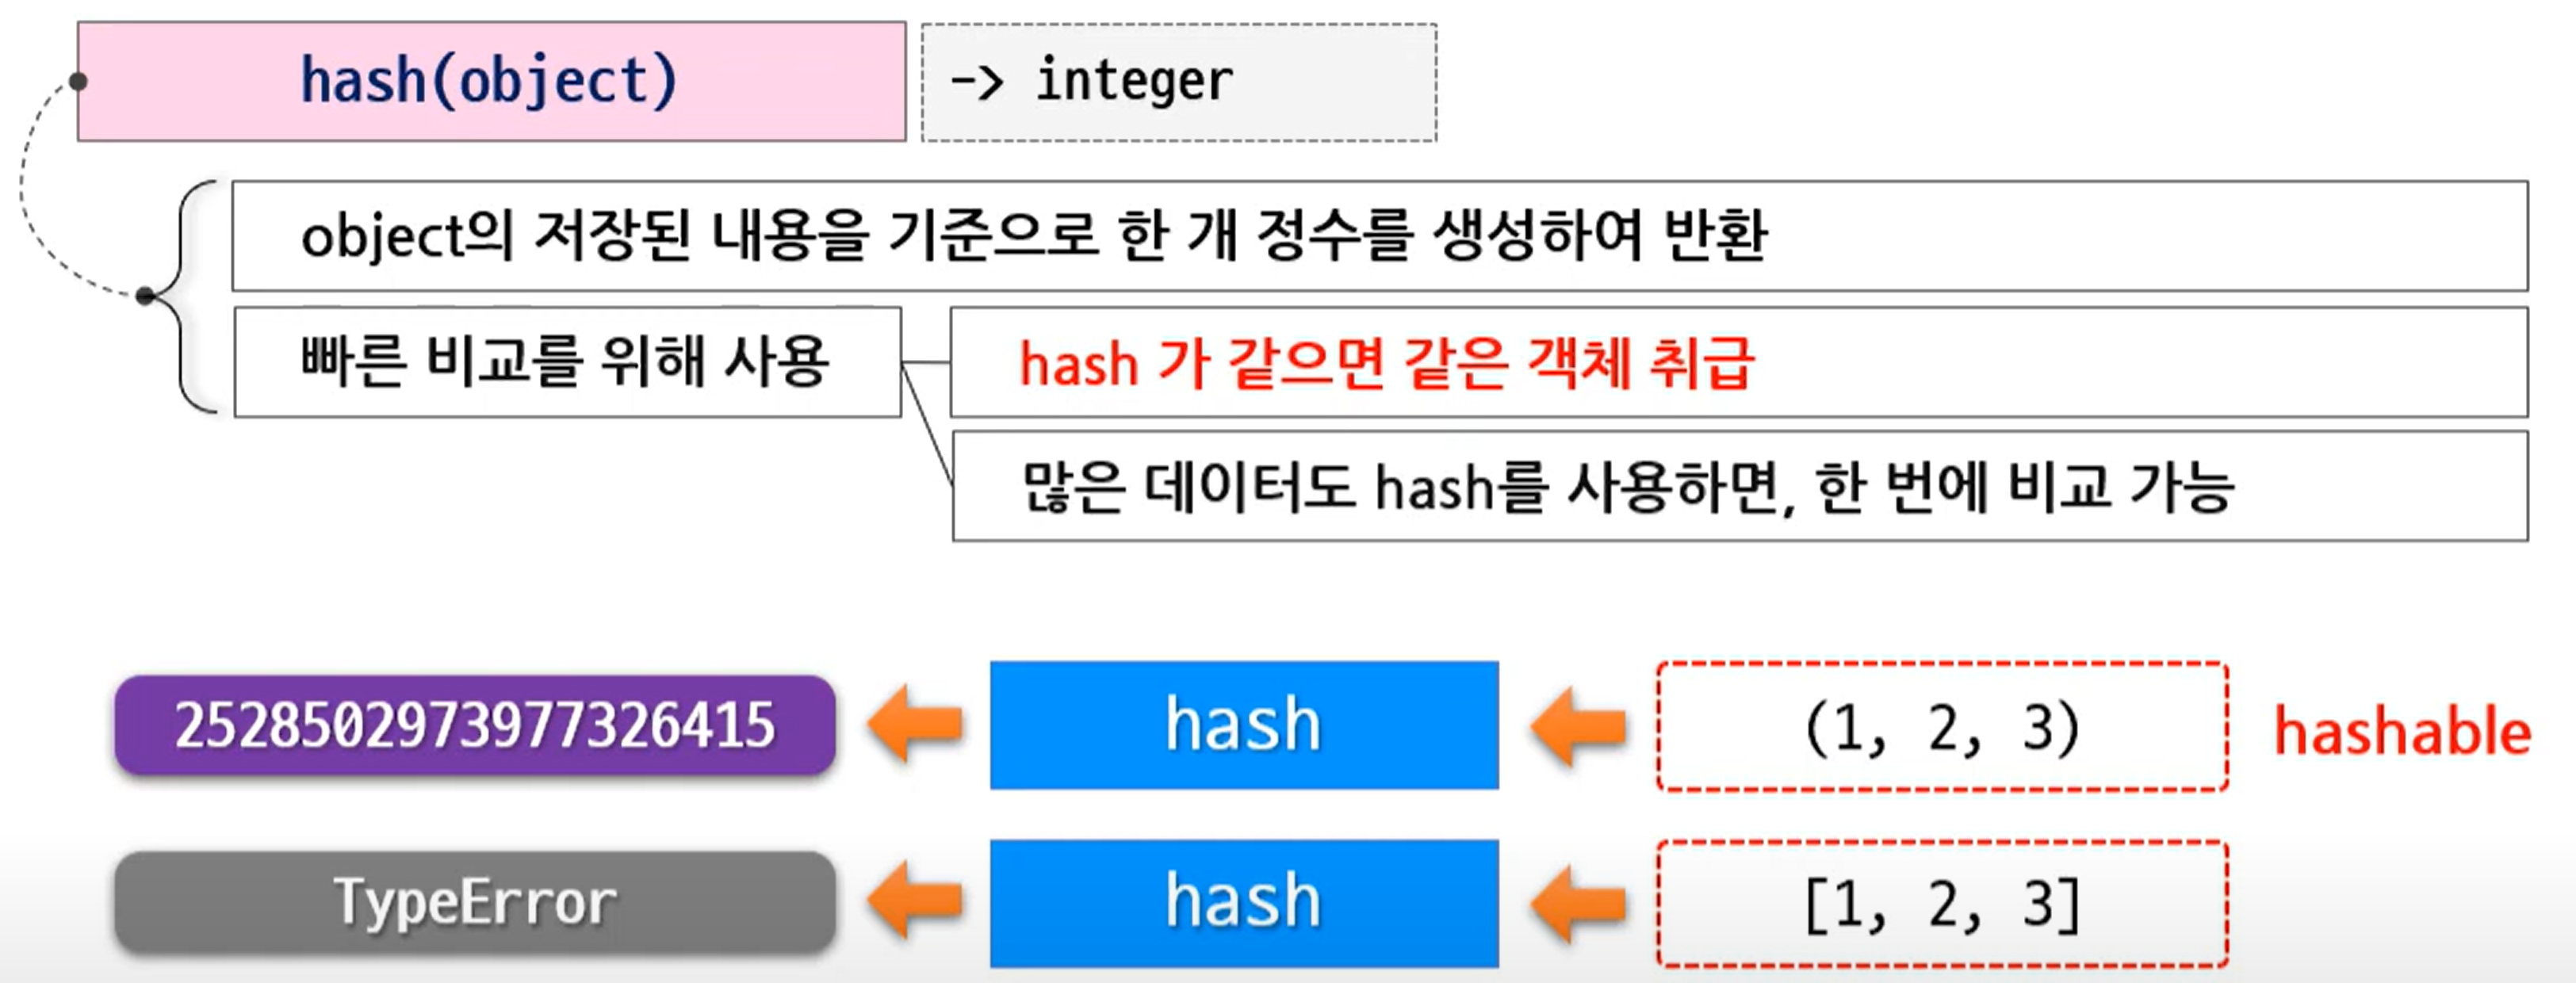


객체가 변하지 않는 고유한 해시값(hash value)를 가진다는 뜻 
- tuple, str, int -> 한번 만들면 내부 값을 바꾸지 못함 : immutable => hashable  
- list, dict, set -> 만들고 나서 원소 추가/삭제 가능 : mutable => hash 불가능  
set의 itme, dict의 key는 빠른 중복 판단을 위해 hashable 객체를 사용하기 때문에 hash 불가능한 list 사용 불가

In [ ]:
## 3트 (실패)

def solution(number):
    cnt = 0
    lst = []
    for i in number:
        for j in number:
            for k in number:
                if i == j or j == k or k == i:
                    break
                else:
                    if i + j + k == 0:
                        lst.append([i, j, k])
                        lst = list(set([tuple(set(item)) for item in lst]))
                        # print(lst)
    return len(lst)

lst 안에 i,j,k 값을 저장하고 중복을 제거하려 했는데 실패

In [39]:
## 4트 (실패)

def solution(number):
    cnt = 0
    result = []
    res = []
    for i in number:
        for j in number:
            for k in number:
                if i == j or j == k or k == i:
                    break
                else:
                    if i + j + k == 0:
                        result.append(sorted([i,j,k]))
    for value in result:
        if value not in res:
            res.append(value)
    print(res)
    return len(res)

print(solution([0,0,0,0]))

[]
0


중복은 제거했지만 반례  
: [0,0,0,0] 같은경우 정답은 4가 되어야 하는데 (4C3) 정답이 0이 나옴  
if i == j or j == k or k == i: 이 if 조건문을 숫자를 직접 갖고오는게 아니라 인덱스로 접근해서 문제를 풀어야 할듯

In [29]:
## 5트 (성공)

def solution(number):
    num = len(number)
    result = []
    res = []
    for i in range(num):
        for j in range(num):
            for k in range(num):
                if i == j or j == k or k == i: # 한사람이 여러 사람 번호를 대신할 수 X
                    break
                else:
                    if number[i] + number[j] + number[k] == 0:
                        result.append(sorted([i,j,k])) # 값이 아니라 인덱스 저장
                                                       # 값을 저장하는 경우라면 아래와 같이 같은숫자가 여러개가 들어가는 경우 중복을 제거하는 과정에서 필터링이되기 때문

    print(result)
    for value in result:
        if value not in res:
            res.append(value)
    print(res)
    return len(res)

print(solution([0,0,0,0]))

[[0, 1, 2], [0, 1, 3], [0, 1, 2], [0, 2, 3], [1, 2, 3], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
[[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
4


## 4. 모음사전 (성공)

[A,E,I,O,U] 
1   A
2   AA
3   AAA
4   AAAA
5   AAAAA
6   AAAAE
7   AAAAI
8   AAAAO
9   AAAAU
10  AAAE
11  AAAEA
12  AAAEE
13  AAAEI
14  AAAEO
15  AAAEU
16  AAAI
17  AAAIA
18  AAAIE
19  AAAIO
20  AAAIU
21  AAAO
...

In [50]:
dic = ['A','E','I']
for i1 in dic:
    for i2 in dic:
        for i3 in dic:
            print(i1+i2+i3)

AAA
AAE
AAI
AEA
AEE
AEI
AIA
AIE
AII
EAA
EAE
EAI
EEA
EEE
EEI
EIA
EIE
EII
IAA
IAE
IAI
IEA
IEE
IEI
IIA
IIE
III


단어 5개를 전부 for문을 돌리면 직관적이지 않고 양이 많기 때문에 3개로 줄여서 문제를 풀어보려고 함.  
정말 단순하게 for문을 돌려봤을때 길이가 1,2인경우는 고려가 되어있지 X

[A,E,I]  
1   A   
2   AA  
3   AAA  
4   AAE  
5   AAI  
6   AE  
7   AEA  
8   AEE  
9   AEI  
10  AI  
11  AIA  
12  AIE  
13  AII  
14  E  
15  EA  
16  EAA  
17  EAE  
18  EAI  
19  EE  
20  EEA  
21  EEE  
22  EEI  
23  EI  
24  EIA  
25  EIE  
26  EII  
27  I  
28  IA  
29  IAA  
30  IAE  
31  IAI  
32  IE  
33  IEA  
34  IEE  
35  IEI   
36  II  
37  IIA  
38  IIE  
39  III  


In [53]:
def solution(word):
    dic = ['A', 'E', 'I']
    cnt = 1
    for i1 in dic:
        print(cnt, i1)
        cnt += 1
        for i2 in dic:
            print(cnt, i1+i2)
            cnt += 1
            for i3 in dic:
                print(cnt, i1+i2+i3)
                cnt += 1

print(solution([]))

1 A
2 AA
3 AAA
4 AAE
5 AAI
6 AE
7 AEA
8 AEE
9 AEI
10 AI
11 AIA
12 AIE
13 AII
14 E
15 EA
16 EAA
17 EAE
18 EAI
19 EE
20 EEA
21 EEE
22 EEI
23 EI
24 EIA
25 EIE
26 EII
27 I
28 IA
29 IAA
30 IAE
31 IAI
32 IE
33 IEA
34 IEE
35 IEI
36 II
37 IIA
38 IIE
39 III
None


In [ ]:
## 1트 (성공)
def solution(word):
    dic = ['A', 'E', 'I', 'O', 'U']
    cnt = 0
    for i1 in dic:
        cnt += 1
        if word == i1:
            return cnt
        for i2 in dic:
            cnt += 1
            if word == i1+i2:
                return cnt
            for i3 in dic:
                cnt += 1
                if word == i1+i2+i3:
                    return cnt
                for i4 in dic:
                    cnt +=1
                    if word == i1+i2+i3+i4:
                        return cnt
                    for i5 in dic:
                        cnt +=1
                        if word == i1+i2+i3+i4+i5:
                            return cnt

print(solution('AAA'))

3
